In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

## Loadint Data 

In [5]:
sales_df = pd.read_excel("./datasets/eCommerce_2018thru2019_Txn.xlsx")
customers_df = pd.read_excel("./datasets/eCustomers.xlsx")
geography_df = pd.read_excel("./datasets/eGeography.xlsx")
calendar_target_df = pd.read_excel("./datasets/eMasterCalendarAndTargets.xlsx")
products_df = pd.read_excel("./datasets/eProductDetail.xlsx")

In [6]:
print("Sales Dataset:", sales_df.shape)
print("Customers Dataset:", customers_df.shape)
print("Geography Dataset:", geography_df.shape)
print("Calendar and Target Dataset:", calendar_target_df.shape)
print("Products Dataset:", products_df.shape)

Sales Dataset: (91665, 11)
Customers Dataset: (798, 13)
Geography Dataset: (2312, 5)
Calendar and Target Dataset: (1461, 7)
Products Dataset: (606, 4)


### SQL Code Converter to Pandas Data Frame Table

In [7]:
from pandasql import sqldf

def make_query(query:str) -> pd.DataFrame:

    return sqldf(query=query)

In [11]:
sales_df.head()

,DateKey,CustomerId,ProductKey,OrderDate,SalesAmount,UnitPrice,OrderQuantity,DueDate,ShipDate,ProductCost,OrderNumber
0,20191231,12015,400,2019-12-31,758.00,758.00,1,2020-01-07,2020-01-05,348.58,US-12015-20191231
1,20191231,12015,469,2019-12-31,99.00,99.00,1,2020-01-07,2020-01-05,50.47,US-12015-20191231
2,20191231,12373,104,2019-12-31,115.00,115.00,1,2020-01-07,2020-01-05,52.88,US-12373-20191231
3,20191231,12373,573,2019-12-31,139.00,139.00,1,2020-01-07,2020-01-05,70.87,US-12373-20191231
4,20191231,12470,111,2019-12-31,249.99,249.99,1,2020-01-07,2020-01-04,82.83,US-12470-20191231


In [20]:
sales_df["YearMonth"] = sales_df["OrderDate"].dt.to_period('M').dt.start_time
sales_df["YearMonth"] = sales_df["YearMonth"].dt.date

## 1. Customer Order Trends over Time

In [25]:
query = """  

SELECT
c.LastName, 
s.YearMonth, 
SUM(s.SalesAmount) AS total_amount, 
COUNT(DISTINCT s.OrderNumber) AS total_orders
FROM sales_df s 
LEFT JOIN customers_df c ON s.CustomerId = c.CustomerId
GROUP BY 1, 2
ORDER BY 1, 2

"""

customer_order_analysis = make_query(query)

customer_order_analysis

,LastName,YearMonth,total_amount,total_orders
0,ABC Resellers,2018-01-01,1045.8900,1
1,ABC Resellers,2018-02-01,472.9900,1
2,ABC Resellers,2018-06-01,887.9900,2
3,ABC Resellers,2018-11-01,1844.5200,2
4,ABC Resellers,2019-04-01,2247.2000,2
...,...,...,...,...
2230,Zhu,2019-10-01,1159.4864,2
2231,Zimmerman,2018-05-01,650.9800,2
2232,Zimmerman,2019-01-01,595.3700,2
2233,Zimmerman,2019-07-01,2309.3600,2


## 2. Market Segmentation

In [35]:
from datetime import datetime

today = datetime.today()

customers_df["BirthDate"] = pd.to_datetime(customers_df["BirthDate"])

customers_df["Age"] = customers_df["BirthDate"].apply(lambda x: (today.year - x.year) - ((today.month, today.day) < (x.month, x.day)))

customers_df["AgeGroup"] = customers_df["Age"].apply(lambda x: 'Young' if x >= 38 and x <= 54 else 'Middle' if x >= 55 and x <= 72 else 'Old' if x >= 73 and x <= 89 else 'Very Old')

customers_df.head()

,CustomerId,LocationId,LastName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalKids,KidsLivingAtHome,HighestEducationLevel,Profession,HomeOwner,CarsOwned,Age,AgeGroup
0,11983,3431,Ortega,1968-02-24,M,F,70000,3,2,Partial College,Professional,1,0,57,Middle
1,11984,3792,Campbell,1962-04-12,M,M,80000,2,1,Bachelors,Management,1,0,62,Middle
2,11985,4622,Hughes,1963-05-18,M,F,80000,2,1,Bachelors,Management,0,1,61,Middle
3,11986,4587,Alvarez,1969-01-20,S,M,70000,0,0,Bachelors,Professional,1,1,56,Middle
4,11987,472,Vazquez,1973-05-26,M,F,90000,4,4,Bachelors,Professional,1,0,51,Young


In [37]:
customers_df["IncomeGroup"] = customers_df["YearlyIncome"].apply(lambda x: 'Low' if x >= 8000 and x<=31000 else 'Middle' if x >= 31001 and x<= 50000 else 'High' if x >= 50001 and x<= 75000 else 'Top')

customers_df["CustomerType"] = customers_df["LastName"].apply(lambda x: 'Corporate' if 'Awari' in x else 'Shoper')

customers_df.head()

,CustomerId,LocationId,LastName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalKids,KidsLivingAtHome,HighestEducationLevel,Profession,HomeOwner,CarsOwned,Age,AgeGroup,IncomeGroup,CustomerType
0,11983,3431,Ortega,1968-02-24,M,F,70000,3,2,Partial College,Professional,1,0,57,Middle,High,Shoper
1,11984,3792,Campbell,1962-04-12,M,M,80000,2,1,Bachelors,Management,1,0,62,Middle,Top,Shoper
2,11985,4622,Hughes,1963-05-18,M,F,80000,2,1,Bachelors,Management,0,1,61,Middle,Top,Shoper
3,11986,4587,Alvarez,1969-01-20,S,M,70000,0,0,Bachelors,Professional,1,1,56,Middle,High,Shoper
4,11987,472,Vazquez,1973-05-26,M,F,90000,4,4,Bachelors,Professional,1,0,51,Young,Top,Shoper


In [38]:
customers_df[customers_df["CustomerType"] == 'Corporate']

,CustomerId,LocationId,LastName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalKids,KidsLivingAtHome,HighestEducationLevel,Profession,HomeOwner,CarsOwned,Age,AgeGroup,IncomeGroup,CustomerType
264,13123,3618,Awari Distributors,1975-01-05,S,F,70000,0,0,Bachelors,Professional,0,1,50,Young,High,Corporate
594,14269,4006,Awari MidWest W/Sale,1981-05-18,M,M,30000,0,0,High School,Skilled Manual,1,2,43,Young,Low,Corporate
633,14562,86,Awari Restocks,1975-07-10,M,M,50000,1,1,Bachelors,Skilled Manual,1,1,49,Young,Middle,Corporate


In [42]:
sales_df["DaysDiff"] = sales_df["DueDate"] - sales_df["ShipDate"]

sales_df.head()

,DateKey,CustomerId,ProductKey,OrderDate,SalesAmount,UnitPrice,OrderQuantity,DueDate,ShipDate,ProductCost,OrderNumber,YearMonth,DaysDiff
0,20191231,12015,400,2019-12-31,758.00,758.00,1,2020-01-07,2020-01-05,348.58,US-12015-20191231,2019-12-01,2 days
1,20191231,12015,469,2019-12-31,99.00,99.00,1,2020-01-07,2020-01-05,50.47,US-12015-20191231,2019-12-01,2 days
2,20191231,12373,104,2019-12-31,115.00,115.00,1,2020-01-07,2020-01-05,52.88,US-12373-20191231,2019-12-01,2 days
3,20191231,12373,573,2019-12-31,139.00,139.00,1,2020-01-07,2020-01-05,70.87,US-12373-20191231,2019-12-01,2 days
4,20191231,12470,111,2019-12-31,249.99,249.99,1,2020-01-07,2020-01-04,82.83,US-12470-20191231,2019-12-01,3 days


In [43]:
shipping_performance = sales_df.groupby("DaysDiff")["OrderNumber"].nunique().reset_index(name="TotalOrders")

shipping_performance

,DaysDiff,TotalOrders
0,0 days,1554
1,1 days,2838
2,2 days,3892
3,3 days,4785
4,4 days,2525
5,5 days,2966
6,6 days,1196
7,7 days,1385


## Qlik Sense Lookup()
- Qlik Sense support Lookup function to search for something, in pandas and SQL it might be replaced by Joins or Window functions or Pandas Transform

In [49]:
query = """

SELECT
*, 
MIN(OrderDate) OVER(PARTITION BY CustomerId) AS FirstPurchaseDay,
MAX(OrderDate) OVER(PARTITION BY CustomerId) AS LastPurchaseDay
FROM sales_df

"""

customers_order_performance = make_query(query=query)
customers_order_performance

/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_22285/4208197477.py:5: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  return sqldf(query=query)


,DateKey,CustomerId,ProductKey,OrderDate,SalesAmount,UnitPrice,OrderQuantity,DueDate,ShipDate,ProductCost,OrderNumber,YearMonth,DaysDiff,FirstOrderDay,LastOrderDay
0,20191109,11983,95,2019-11-09 00:00:00.000000,67.4000,67.4000,1,2019-11-16 00:00:00.000000,2019-11-12 00:00:00.000000,34.36,US-11983-20191109,2019-11-01,345600000000000,2018-02-03 00:00:00.000000,2019-11-09 00:00:00.000000
1,20191109,11983,313,2019-11-09 00:00:00.000000,269.0000,269.0000,1,2019-11-16 00:00:00.000000,2019-11-12 00:00:00.000000,137.14,US-11983-20191109,2019-11-01,345600000000000,2018-02-03 00:00:00.000000,2019-11-09 00:00:00.000000
2,20191106,11983,1,2019-11-06 00:00:00.000000,12.9900,12.9900,1,2019-11-13 00:00:00.000000,2019-11-09 00:00:00.000000,6.62,US-11983-20191106,2019-11-01,345600000000000,2018-02-03 00:00:00.000000,2019-11-09 00:00:00.000000
3,20191106,11983,572,2019-11-06 00:00:00.000000,190.0000,190.0000,1,2019-11-13 00:00:00.000000,2019-11-09 00:00:00.000000,87.37,US-11983-20191106,2019-11-01,345600000000000,2018-02-03 00:00:00.000000,2019-11-09 00:00:00.000000
4,20190912,11983,90,2019-09-12 00:00:00.000000,149.9900,149.9900,1,2019-09-19 00:00:00.000000,2019-09-17 00:00:00.000000,49.69,US-11983-20190912,2019-09-01,172800000000000,2018-02-03 00:00:00.000000,2019-11-09 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91660,20190302,15458,137,2019-03-02 00:00:00.000000,409.9918,409.9918,1,2019-03-09 00:00:00.000000,2019-03-08 00:00:00.000000,229.93,US-15458-20190302,2019-03-01,86400000000000,2019-03-02 00:00:00.000000,2019-09-17 00:00:00.000000
91661,20190302,15458,533,2019-03-02 00:00:00.000000,228.7800,228.7800,1,2019-03-09 00:00:00.000000,2019-03-08 00:00:00.000000,128.30,US-15458-20190302,2019-03-01,86400000000000,2019-03-02 00:00:00.000000,2019-09-17 00:00:00.000000
91662,20190302,15458,560,2019-03-02 00:00:00.000000,190.0000,190.0000,1,2019-03-09 00:00:00.000000,2019-03-08 00:00:00.000000,87.37,US-15458-20190302,2019-03-01,86400000000000,2019-03-02 00:00:00.000000,2019-09-17 00:00:00.000000
91663,20190302,15458,572,2019-03-02 00:00:00.000000,190.0000,190.0000,1,2019-03-09 00:00:00.000000,2019-03-08 00:00:00.000000,87.37,US-15458-20190302,2019-03-01,86400000000000,2019-03-02 00:00:00.000000,2019-09-17 00:00:00.000000


/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_22285/3015467347.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




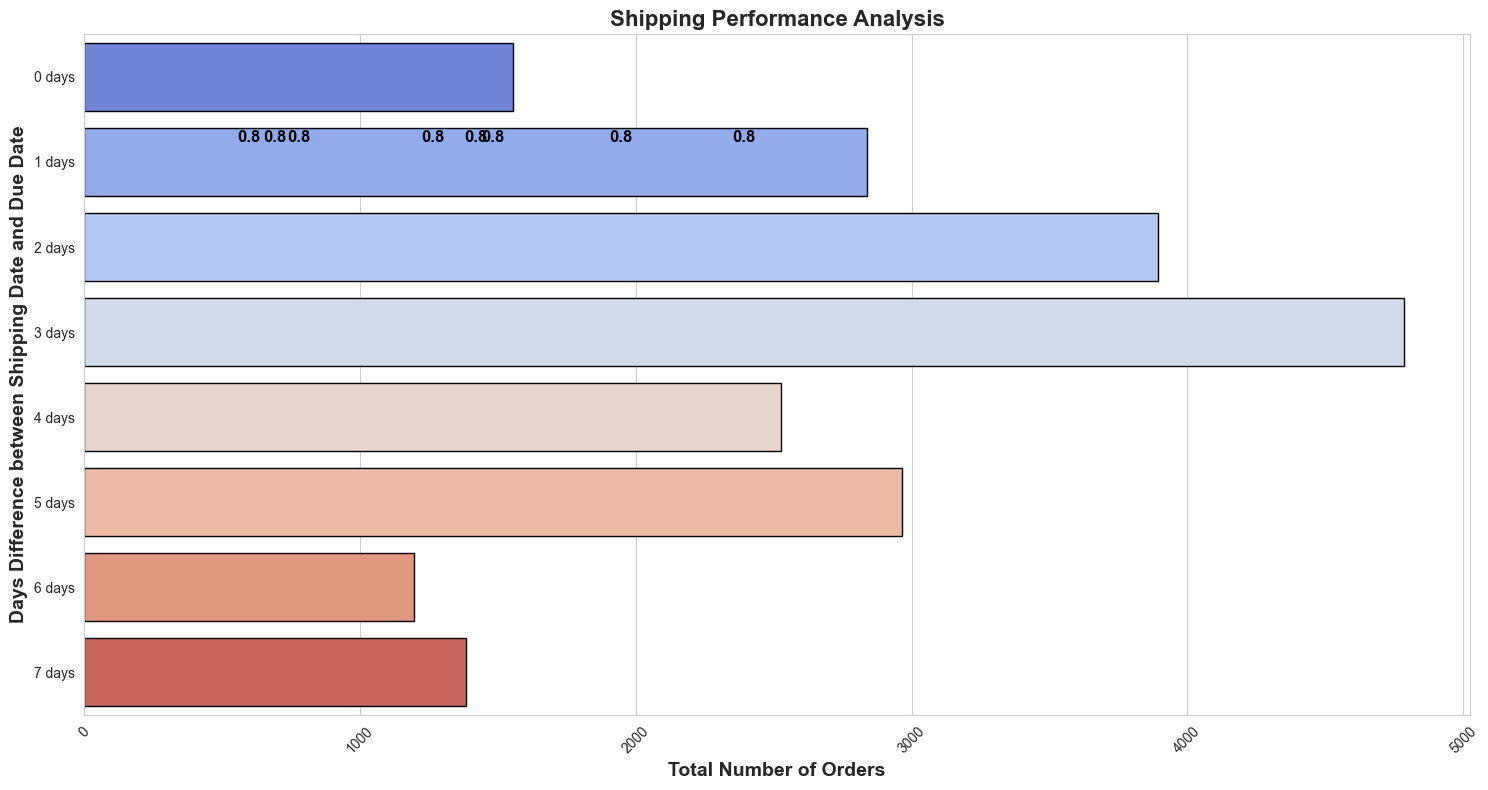

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set a creative Seaborn style
sns.set_style("whitegrid")  

# Create a figure with a modern size
plt.figure(figsize=(15, 8))

# Choose a vibrant color palette
colors = sns.color_palette("coolwarm", len(shipping_performance))

# Create the barplot with edge colors
ax = sns.barplot(
    data=shipping_performance,
    x="TotalOrders",
    y="DaysDiff",
    palette=colors,
    edgecolor="black"
)

# Annotate bars with values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black'
    )

# Add labels and title
plt.ylabel("Days Difference between Shipping Date and Due Date", fontsize=14, fontweight='bold')
plt.xlabel("Total Number of Orders", fontsize=14, fontweight='bold')
plt.title("Shipping Performance Analysis", fontsize=16, fontweight='bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()



In [80]:
query = """  

SELECT
    c.LastName,sub.TotalAmount
FROM (SELECT
        s.CustomerId, 
        SUM(s.SalesAmount) AS TotalAmount
      FROM sales_df s
      INNER JOIN customers_df c ON s.CustomerId = c.CustomerId
      WHERE c.CustomerType = 'Shoper'
      GROUP BY 1
      ORDER BY 2 DESC
      LIMIT 10) AS sub
INNER JOIN customers_df c ON sub.CustomerId = c.CustomerId

"""

make_query(query)

/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_22285/4208197477.py:5: UserWarning:

the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.



,LastName,TotalAmount
0,Carson,2.253628e+04
1,Rai,2.210791e+06
2,Morgan,2.071238e+04
3,Xu,2.226715e+04
4,Bell,2.164509e+06
5,King,2.230627e+04
6,Gao,2.117574e+04
7,Patel,1.974999e+04
8,Roberts,2.361169e+06
9,Subram,2.060052e+04


In [116]:
query = """  

WITH new_comers AS (SELECT
*,
CASE 
    WHEN OrderDate BETWEEN '2019-01-01' AND '2019-12-31' THEN 'New Customer'
    ELSE 'Old Customer'
END AS NewCustomers
FROM sales_df )


SELECT
NewCustomers,
COUNT(DISTINCT CustomerId) AS TotalCustomersCount
FROM new_comers
GROUP BY 1

"""

customers_churn =make_query(query)

customers_churn

/var/folders/0n/r32p0lc14jbgb5t0c9mntm4h0000gn/T/ipykernel_22285/4208197477.py:5: UserWarning:

the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.



,NewCustomers,TotalCustomersCount
0,New Customer,700
1,Old Customer,646


In [113]:
customer_performance = pd.merge(sales_df, customers_df, on="CustomerId", how="left")

customer_performance["Id"] = customer_performance["CustomerId"].astype(str) +" : " + customer_performance["LastName"]

customer_performance["Year"] = customer_performance["OrderDate"].dt.year

orders_analysis = customer_performance.groupby(["Id", "Year"])["OrderNumber"].nunique().reset_index()

orders_analysis = orders_analysis.pivot_table(index="Id", columns="Year", values="OrderNumber").reset_index()

orders_analysis

Year,Id,2018,2019
0,11983 : Ortega,2.0,4.0
1,11984 : Campbell,4.0,10.0
2,11985 : Hughes,4.0,2.0
3,11986 : Alvarez,8.0,6.0
4,11987 : Vazquez,NaN,2.0
...,...,...,...
773,15454 : Bennett,4.0,2.0
774,15455 : Raman,8.0,6.0
775,15456 : Suri,NaN,8.0
776,15457 : Martinez,NaN,6.0


In [125]:
total = len(sales_df["CustomerId"].unique())
new_customers = customers_churn["TotalCustomersCount"][0]
churn_rate = round(100-(new_customers/total*100), 2)

data = {
    "Total Customers" : [total],
    "New Customers":[new_customers],
    "Churn Rate": [churn_rate]
}

churn_details = pd.DataFrame(data=data)
churn_details

,Total Customers,New Customers,Churn Rate
0,778,700,10.03
